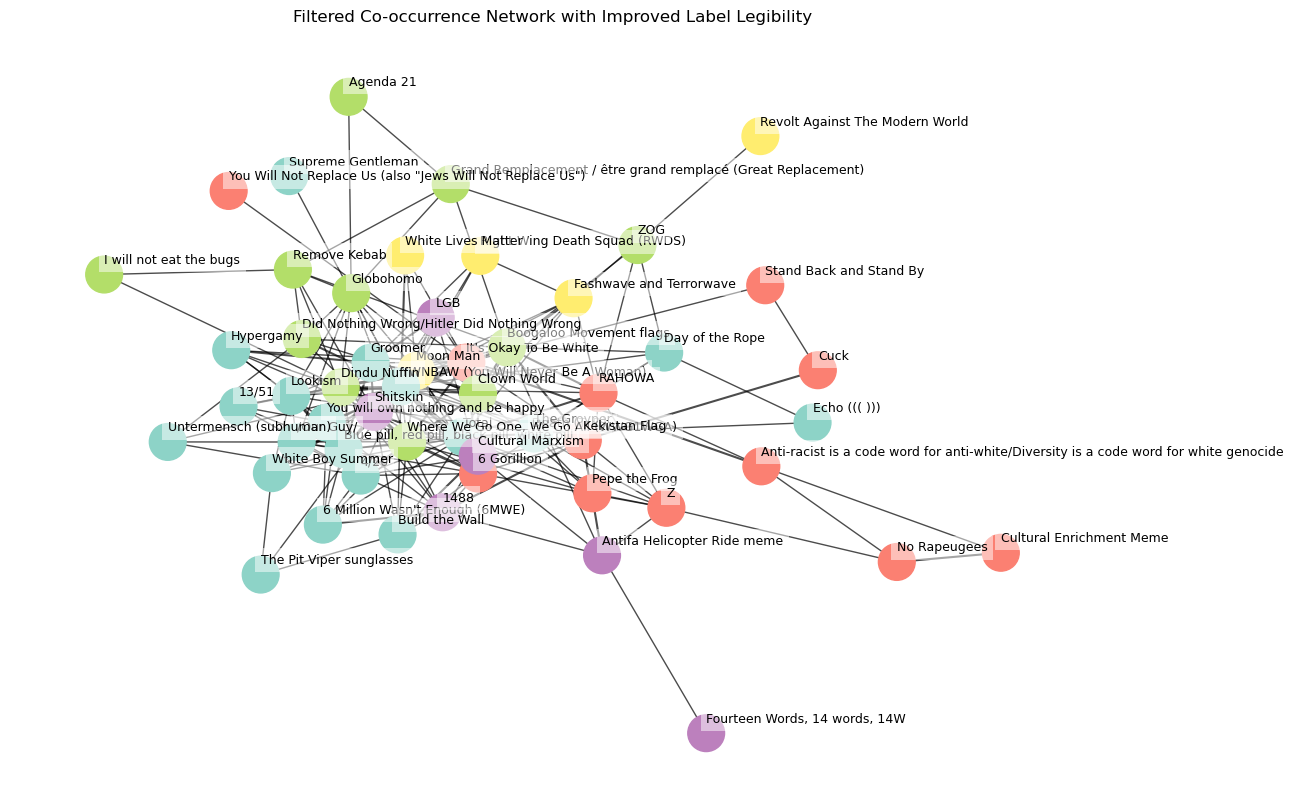

In [12]:
import itertools
from collections import defaultdict
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Path to your JSON file
file_path = r"C:\Users\leonc\Thesis 2024\Toxic-Symbology\Image Clustering\56_clusters\56_clusters.json"

# Read JSON data from the file
with open(file_path, "r") as f:
    data = json.load(f)

# Group symbols by cluster
clusters = defaultdict(list)
for entry in data.values():
    clusters[entry['subfolder']].append(entry['symbol_name'])

# Count co-occurrences
co_occurrence_counts = defaultdict(int)
for symbols in clusters.values():
    for pair in itertools.combinations(set(symbols), 2):
        co_occurrence_counts[tuple(sorted(pair))] += 1

# Create a NetworkX graph
G = nx.Graph()

# Add edges with weights
for (symbol1, symbol2), count in co_occurrence_counts.items():
    if count >= 2:  # Filter edges with weight >= 2
        G.add_edge(symbol1, symbol2, weight=count)

# Community detection
communities = list(greedy_modularity_communities(G))

# Assign colors to communities
node_colors = {}
for i, community in enumerate(communities):
    for node in community:
        node_colors[node] = i

# Draw the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)

# Draw nodes with community colors
colors = [node_colors[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=colors, cmap=plt.cm.Set3)

# Draw edges with weights
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, width=[w * 0.5 for w in weights], alpha=0.7)

# Draw labels with dynamic positioning
for node, (x, y) in pos.items():
    plt.text(x, y + 0.03, s=node, fontsize=9, bbox=dict(facecolor="white", alpha=0.5, edgecolor="none"))

# Add title
plt.title("Filtered Co-occurrence Network with Improved Label Legibility")
plt.axis("off")
plt.show()
